# 2D Heat Equation – Demo v2.2

This version extends the v2.1 simulation by:

- Adding a compact animation of the evolving heat field
- Computing the L² error with respect to the initial condition
- Finalizing diagnostics for field evolution

In [7]:
import sys
from pathlib import Path
sys.path.append(str(Path("../src").resolve()))

import numpy as np
import matplotlib.pyplot as plt

from numerics.laplacian_2d import make_laplacian_2d
from pdes.heat_solver_2d import run_heat_solver_2d
from utils.diagnostics import compute_l2_error
from visualization.plotting_2d import animate_2d

## Grid Setup

We simulate on a square domain of length:

$$
L = 10
$$

with grid resolution:

$$
N \times N = 64 \times 64
$$

In [8]:
N = 64
L = 10.0
dx = dy = L / N

x = np.linspace(-L/2, L/2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y, indexing="ij")

## Initial Condition – Gaussian Bump

$$
u_0(x, y) = \exp\left( -\frac{x^2 + y^2}{2} \right)
$$

In [9]:
def gaussian_bump_2d(X, Y, width=1.0, amplitude=1.0):
    return amplitude * np.exp(-(X**2 + Y**2) / (2 * width**2))

u0 = gaussian_bump_2d(X, Y)

## Sparse Kronecker-Sum Laplacian

In [10]:
L_op = make_laplacian_2d(N, N, dx, dy)
print("Laplacian shape:", L_op.shape)

Laplacian shape: (4096, 4096)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


## Evolving the 2D Heat Equation

We solve:

$$
\frac{du}{dt} = \alpha L u
$$

with periodic boundary conditions.

In [11]:
alpha = 1.0
dt = 0.01
steps = 500

u_history, diagnostics = run_heat_solver_2d(u0, L_op, alpha, dt, steps)

## Animate Heat Evolution

In [12]:
# Save to file (high compression)
animate_2d(u_history, x, y, interval=40, filename="heat_2D.mp4")

## Diagnostics Over Time

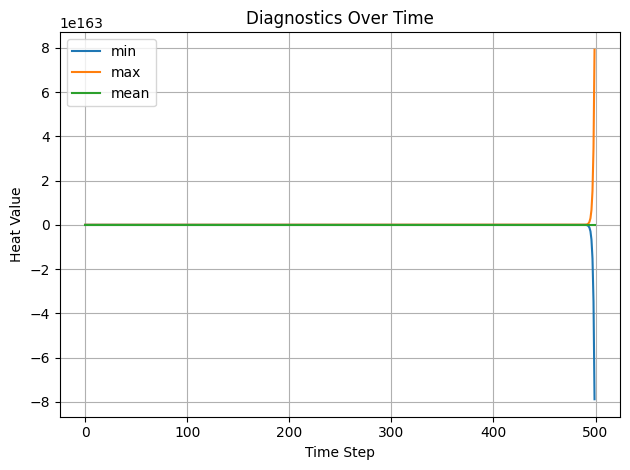

In [13]:
mins = [d["min"] for d in diagnostics]
maxs = [d["max"] for d in diagnostics]
means = [d["mean"] for d in diagnostics]

plt.plot(mins, label="min")
plt.plot(maxs, label="max")
plt.plot(means, label="mean")
plt.xlabel("Time Step")
plt.ylabel("Heat Value")
plt.title("Diagnostics Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## L² Error vs Initial Condition

We compute:

$$
\| u(t) - u_0 \|_2^2
$$

for each time step.

In [ ]:
errors = compute_l2_error(u_history, u_history[0], dx * dy)
plt.plot(errors)
plt.xlabel("Time step")
plt.ylabel("L² error")
plt.title("Deviation from initial condition")
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: compute_l2_error() missing 1 required positional argument: 'dx'

## Summary of Version 2.2

- Implemented animation for 2D evolving fields (HTML5 or `.mp4`)
- Computed diagnostic quantities over time
- Tracked L² deviation from the initial Gaussian bump

This notebook now supports full visual and numerical diagnostics for 2D PDE simulations.